In [1]:
import numpy as np 

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt 

In [4]:
%matplotlib inline 

In [5]:
df = pd.read_csv("FuelConsumptionCo2.csv")

In [6]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [8]:
cdf = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]

In [9]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


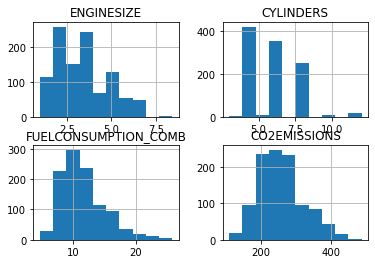

In [10]:
vis = cdf[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
vis.hist()
plt.show()

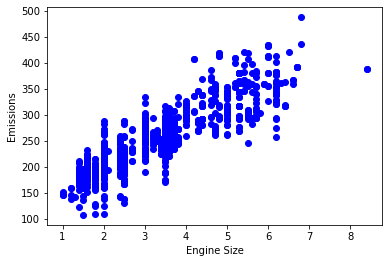

In [11]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = "blue")
plt.xlabel("Engine Size")
plt.ylabel("Emissions")
plt.show()

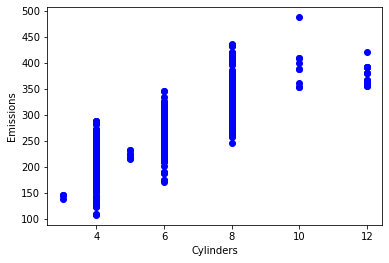

In [12]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color = "blue")
plt.xlabel("Cylinders")
plt.ylabel("Emissions")
plt.show()

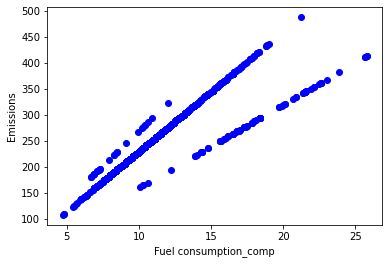

In [13]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = "blue")
plt.xlabel("Fuel consumption_comp")
plt.ylabel("Emissions")
plt.show()

In [14]:
msk = np.random.rand(len(df))<0.8
train = cdf[msk]
test = cdf[~msk]

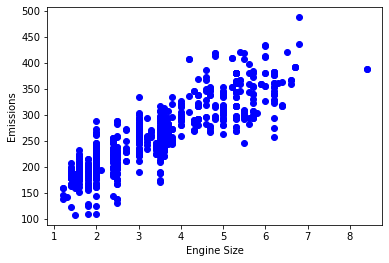

In [15]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color="blue")
plt.xlabel("Engine Size")
plt.ylabel("Emissions")
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression 

In [17]:
reg = LinearRegression()

In [18]:
x_train = np.asanyarray(train[["ENGINESIZE"]])
y_train=np.asanyarray(train[["CO2EMISSIONS"]])
reg.fit(x_train,y_train)

LinearRegression()

In [19]:
print(reg.coef_)

[[38.97612501]]


In [20]:
print(reg.intercept_)


[125.6601127]


<function matplotlib.pyplot.show(close=None, block=None)>

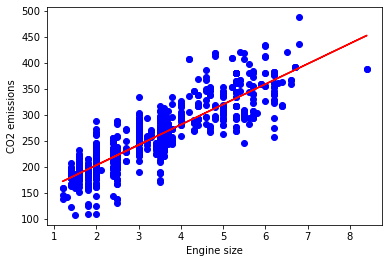

In [21]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color="blue")
plt.plot(x_train, reg.coef_[0][0]*x_train+reg.intercept_[0], "-r")
plt.xlabel("Engine size")
plt.ylabel("CO2 emissions")
plt.show

In [22]:
from sklearn.metrics import r2_score

In [23]:
x_test = np.asanyarray(test[["ENGINESIZE"]])

In [24]:
y_test = np.asanyarray(test[["CO2EMISSIONS"]])

In [25]:
y_hat = reg.predict(x_test)

In [26]:
print(y_hat[0:5])

[[184.12430022]
 [219.20281273]
 [219.20281273]
 [262.07655024]
 [308.84790026]]


In [27]:
print("mean aboslute error", np.mean(np.absolute(y_hat-y_test)))

mean aboslute error 23.91254679475835


In [28]:
print("mean squarred error", np.mean((y_hat-y_test)**2))

mean squarred error 921.0109524845124


In [29]:
r2_score(y_test,y_hat)

0.7690049864212906